In [1]:
import numpy as np
from utils import *
%matplotlib notebook

In [2]:
L = 1
T = .1

h = .1
k = 0.001

r = k / h**2
print('r = k/h**2 = %g' % r)

Nx = int(np.ceil(L / h)) + 1
Nt = int(np.ceil(T / k)) + 1

print('Number of discretization on x:', Nx)
print('Number of discretization on t:', Nt)

r = k/h**2 = 0.1
Number of discretization on x: 11
Number of discretization on t: 101


In [3]:
@np.vectorize
def initial(x):
    if 0 <= x <= 1 / 2:
        return 2 * x
    elif 1 / 2 <= x <= 1:
        return 2 * (1 - x)

In [4]:
x = np.array([i * h for i in range(Nx)])
t = np.array([i * k for i in range(Nt)])

u0 = initial(x)

In [5]:
u = np.zeros((Nt, Nx))
u[0, :] = u0

# for j in range(Nt - 1):
#     for i in range(1, Nx - 1):
#         u[j + 1, i] = r * u[j, i - 1] + (1 - 2 * r) * u[j, i] + r * u[j, i + 1]

# vectorized form
for j in range(Nt - 1):
    u[j + 1, 1:-1] = r * u[j, :-2] + (1 - 2 * r) * u[j, 1:-1] + r * u[j, 2:]

In [6]:
print_table(u, x, t)

╒═══════════════╤═══════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤═══════╕
│       x       │  0.0  │  0.1   │  0.2   │  0.3   │  0.4   │  0.5   │  0.6   │  0.7   │  0.8   │  0.9   │  1.0  │
╞═══════════════╪═══════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪═══════╡
│   j=0(t=0)    │   0   │  0.2   │  0.4   │  0.6   │  0.8   │   1    │  0.8   │  0.6   │  0.4   │  0.2   │   0   │
├───────────────┼───────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼───────┤
│ j=1(t=0.001)  │   0   │  0.2   │  0.4   │  0.6   │  0.8   │  0.96  │  0.8   │  0.6   │  0.4   │  0.2   │   0   │
├───────────────┼───────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼───────┤
│ j=2(t=0.002)  │   0   │  0.2   │  0.4   │  0.6   │ 0.796  │ 0.928  │ 0.796  │  0.6   │  0.4   │  0.2   │   0   │
├───────────────┼───────┼────────┼────────┼────────┼────────┼────────┼────────┼─

<IPython.core.display.Javascript object>


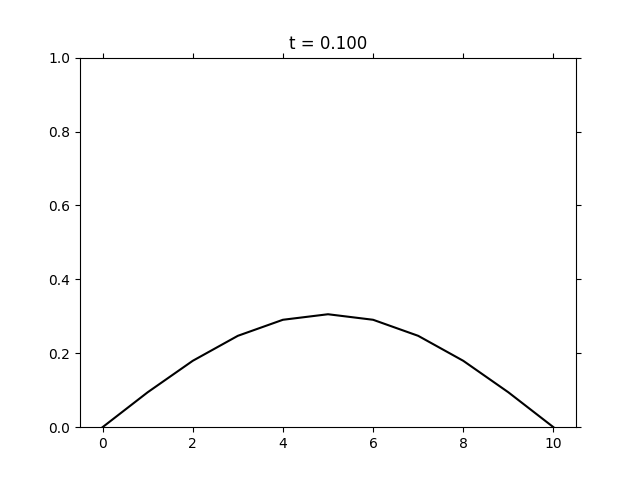

In [7]:
animate_line(u, t, sampling=5)

<IPython.core.display.Javascript object>


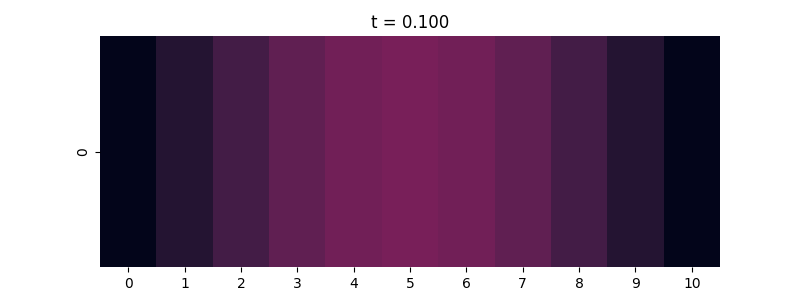

In [8]:
animate_heatmap(u, t, sampling=2)